## 4.3 Statical language modeling

### (a)

In [8]:
# read data from txt files
with open('hw4_vocab.txt','r') as f:
    vocab = f.readlines()
    f.close()
with open('hw4_unigram.txt','r') as f:
    count_uni = f.readlines()
    f.close()

In [9]:
# data cleaning
import numpy as np
for i in range(len(vocab)):
    vocab_stripped = vocab[i].strip()
    count_uni_stripped = int(count_uni[i].strip())
    vocab[i], count_uni[i] = vocab_stripped, count_uni_stripped
count_uni = np.array(count_uni)
#numeric unigram probability
prob_uni = count_uni / np.sum(count_uni)

In [10]:
for i in range(len(vocab)):
    if vocab[i].startswith('M'):
        print('vocab=%s, prob=%.5f' % (vocab[i], prob_uni[i]))

vocab=MILLION, prob=0.00207
vocab=MORE, prob=0.00171
vocab=MR., prob=0.00144
vocab=MOST, prob=0.00079
vocab=MARKET, prob=0.00078
vocab=MAY, prob=0.00073
vocab=M., prob=0.00070
vocab=MANY, prob=0.00070
vocab=MADE, prob=0.00056
vocab=MUCH, prob=0.00051
vocab=MAKE, prob=0.00051
vocab=MONTH, prob=0.00044
vocab=MONEY, prob=0.00044
vocab=MONTHS, prob=0.00041
vocab=MY, prob=0.00040
vocab=MONDAY, prob=0.00038
vocab=MAJOR, prob=0.00037
vocab=MILITARY, prob=0.00035
vocab=MEMBERS, prob=0.00034
vocab=MIGHT, prob=0.00027
vocab=MEETING, prob=0.00027
vocab=MUST, prob=0.00027
vocab=ME, prob=0.00026
vocab=MARCH, prob=0.00026
vocab=MAN, prob=0.00025
vocab=MS., prob=0.00024
vocab=MINISTER, prob=0.00024
vocab=MAKING, prob=0.00021
vocab=MOVE, prob=0.00021
vocab=MILES, prob=0.00021


### (b)

$p_b(w'|w)=\frac{count(w,w')}{\sum_{w''}count(w,w'')}$

In [56]:
import csv
# count_bi_matrix[w1][w2] = count(w1, w2)
count_bi_matrix = np.zeros((len(vocab),len(vocab)))
with open('hw4_bigram.txt','r') as f:
    f = csv.reader(f, delimiter="\t")
    for row in f:
        count_bi_matrix[int(row[0])-1][int(row[1])-1] = int(row[2])

In [57]:
index_of_the = vocab.index('THE')
index_of_the

3

`count_parent[w]` represents $\sum_{w''}count(w,w'')$

In [58]:
# bigram probability distribution
count_parent = np.sum(count_bi_matrix, axis = 1)
count_parent[index_of_the]

3855375.0

In [59]:
# divide each row by each element in count_parent
prob_bi = np.nan_to_num((count_bi_matrix.T / count_parent)).T
most_10 = np.argsort(prob_bi[index_of_the])[-10:]
for item in most_10:
    print(vocab[item], prob_bi[index_of_the][item])

TWO 0.006160749602827221
SAME 0.006287066757449016
NINETEEN 0.006650714911000876
GOVERNMENT 0.006803488635995202
UNITED 0.008672308141231398
NEW 0.009451480076516552
COMPANY 0.011658788055636611
FIRST 0.011720260675031612
U. 0.013372499432610317
<UNK> 0.6150198100055118


/var/folders/jj/st19g0h11dj2btjtztczv4bc0000gn/T/ipykernel_58553/1356996494.py:2: RuntimeWarning: invalid value encountered in true_divide
  prob_bi = np.nan_to_num((count_bi_matrix.T / count_parent)).T


### (c)

In [71]:
sentence1 = "THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK"
sentence1_split = sentence1.split()
print(sentence1_split)
sentence1_index = [vocab.index(item) for item in sentence1_split]
print(sentence1_index)

['THE', 'STOCK', 'MARKET', 'FELL', 'BY', 'ONE', 'HUNDRED', 'POINTS', 'LAST', 'WEEK']
[3, 132, 121, 376, 25, 16, 26, 439, 88, 155]


In [72]:
def log_likelihood_uni(prob_uni, sentence_index):
    return np.sum(np.log(prob_uni[sentence_index]))
Lu = log_likelihood_uni(prob_uni, sentence1_index)
print('The log-likelihood under the uni-gram model is %.5f' % Lu)

The log-likelihood under the uni-gram model is -64.50944


In [93]:
def log_likelihood_bi(prob_bi, sentence_index, debug_info=False):
    word_count = len(sentence_index)
    sentence_prob_bi = np.zeros(word_count)
    sentence_prob_bi[0] = prob_bi[vocab.index('<s>')][sentence_index[0]]
    for i in range(1, word_count):
        if debug_info and prob_bi[sentence_index[i-1]][sentence_index[i]] == 0:
            print('No bi-gram relationship of \'%s\' -> \'%s\' was found in the dataset.' % (vocab[sentence_index[i-1]], vocab[sentence_index[i]]))
        sentence_prob_bi[i] = prob_bi[sentence_index[i-1]][sentence_index[i]]
    return np.sum(np.log(sentence_prob_bi))
Lb = log_likelihood_bi(prob_bi, sentence1_index)
print('The log-likelihood under the bi-gram model is %.5f' % Lb)

The log-likelihood under the bi-gram model is -40.91813


### (d)

In [94]:
sentence2 = "THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE"
sentence2_split = sentence2.split()
print(sentence2_split)
sentence2_index = [vocab.index(item) for item in sentence2_split]
print(sentence2_index)

['THE', 'SIXTEEN', 'OFFICIALS', 'SOLD', 'FIRE', 'INSURANCE']
[3, 498, 133, 499, 443, 488]


In [95]:
Lu = log_likelihood_uni(prob_uni, sentence2_index)
print('The log-likelihood under the uni-gram model is %.5f' % Lu)
Lb = log_likelihood_bi(prob_bi, sentence2_index)
print('The log-likelihood under the bi-gram model is %.5f' % Lb)

The log-likelihood under the uni-gram model is -44.29193
The log-likelihood under the bi-gram model is -inf


/var/folders/jj/st19g0h11dj2btjtztczv4bc0000gn/T/ipykernel_58553/546246704.py:9: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(sentence_prob_bi))


The absence of 'SIXTEEN' -> 'OFFICIALS' and 'SOLD' -> 'FIRE' in the training corpus causes the bigram-based log likelihood to be -inf.

### (e)

In [96]:
def log_likelihood_mixture(prob_uni, prob_bi, sentence_index, l, debug_info=False):
    word_count = len(sentence_index)
    sentence_prob_bi = np.zeros(word_count)
    sentence_prob_bi[0] = prob_bi[vocab.index('<s>')][sentence_index[0]]
    for i in range(1, word_count):
        if debug_info and prob_bi[sentence_index[i-1]][sentence_index[i]] == 0:
            print('No bi-gram relationship of \'%s\' -> \'%s\' was found in the dataset.' % (vocab[sentence_index[i-1]], vocab[sentence_index[i]]))
        sentence_prob_bi[i] = prob_bi[sentence_index[i-1]][sentence_index[i]]
    sentence_prob_uni = prob_uni[sentence_index]
    sentence_prob_mix = l * sentence_prob_uni + (1-l) * sentence_prob_bi
    return np.sum(np.log(sentence_prob_mix))

In [97]:
lambda_list = np.linspace(0.0001,0.9999,10000)
Lm = [log_likelihood_mixture(prob_uni, prob_bi, sentence2_index, l) for l in lambda_list]
best_lambda = lambda_list[np.argmax(Lm)]
print('The optimal value of lambda is %.2f' % best_lambda)

The optimal value of lambda is 0.65


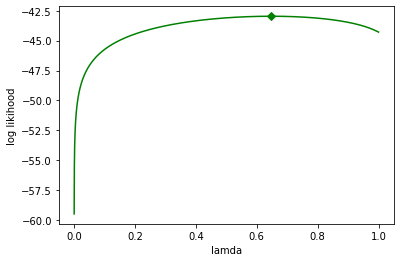

In [101]:
import matplotlib.pyplot as plt
plt.plot(lambda_list, Lm, '-gD', markevery=[np.argmax(Lm)])
plt.xlabel('lamda')
plt.ylabel('log likihood')
plt.show()